### Series
Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers,
Python objects, etc.). The axis labels are collectively referred to as the index.

In [1]:
#!pip install pandas
import pandas as pd
import numpy as np

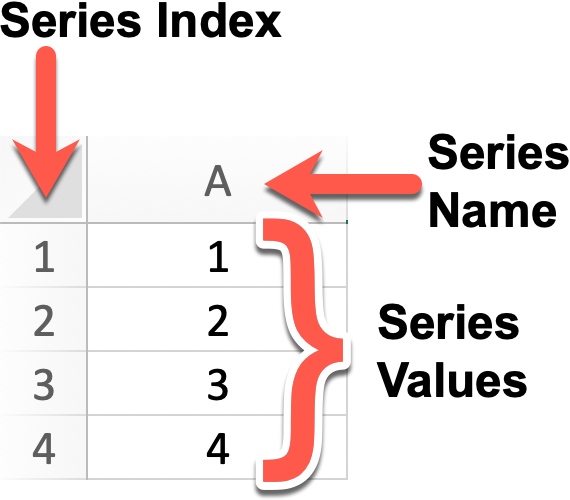

##### Create series from NumPy array
number of labels in 'index' must be the same as the number of elements in array

In [2]:
my_simple_series = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
my_simple_series

a   -1.258047
b    0.985250
c   -0.988089
d   -0.974374
e   -0.274683
dtype: float64

In [3]:
my_simple_series.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [4]:
my_simple_series.values

array([ 1.25227638,  1.33246068,  1.97125201, -0.36193773, -1.22318222])

##### Create series from NumPy array, without explicit index

In [3]:
my_simple_series = pd.Series(np.random.randn(5))
my_simple_series

0    0.527837
1   -0.328731
2   -0.924890
3   -1.513530
4    1.183757
dtype: float64

In [6]:
help(pd.Series)

Help on class Series in module pandas.core.series:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.generic.NDFrame)
 |  Series(data=None, index=None, dtype: 'Dtype | None' = None, name=None, copy: 'bool' = False, fastpath: 'bool' = False)
 |  
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |  
 |  Operations between Series (+, -, /, *, **) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, Iterable, dict, or scalar value
 |      Contains data stored in Ser

Access a series like a NumPy array

In [8]:
my_simple_series[:1]

0    0.950653
dtype: float64

##### Create series from Python dictionary

In [4]:
my_dictionary = {'a' : 45., 'b' : -19.5, 'c' : 4444}
my_second_series = pd.Series(my_dictionary)
my_second_series

a      45.0
b     -19.5
c    4444.0
dtype: float64

Access a series like a dictionary

In [5]:
my_second_series['b']

-19.5

In [6]:
pd.Series(my_dictionary, index=['b', 'c', 'd'])

b     -19.5
c    4444.0
d       NaN
dtype: float64

In [7]:
pd.Series(my_dictionary, index=['1', '2', '3'])

1   NaN
2   NaN
3   NaN
dtype: float64

In [13]:
my_second_series.get('a')

45.0

In [14]:
unknown = my_second_series.get('a')
type(unknown)

numpy.float64

In [15]:
my_second_series['E'] = 20

In [16]:
my_second_series

a      45.0
b     -19.5
c    4444.0
E      20.0
dtype: float64

In [17]:
del my_second_series['E']
my_second_series

a      45.0
b     -19.5
c    4444.0
dtype: float64

##### Create series from scalar
If data is a scalar value, an index must be provided. The value will be repeated to match the length of index

In [18]:
pd.Series(5., index=['a', 'b', 'c', 'd', 'e'])

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

In [19]:
pd.Series(5.)

0    5.0
dtype: float64

### Time-series data


In [8]:
my_index = pd.date_range('23/02/2025', periods=9, freq='min')
my_series = pd.Series(np.arange(9), index=my_index)
my_series

2025-02-23 00:00:00    0
2025-02-23 00:01:00    1
2025-02-23 00:02:00    2
2025-02-23 00:03:00    3
2025-02-23 00:04:00    4
2025-02-23 00:05:00    5
2025-02-23 00:06:00    6
2025-02-23 00:07:00    7
2025-02-23 00:08:00    8
Freq: T, dtype: int32

In [9]:
len(my_index)

9

In [10]:
type(my_series)

pandas.core.series.Series

In [11]:
my_series['2025-02-23 00:02:00':'2025-02-23 00:06:00']

2025-02-23 00:02:00    2
2025-02-23 00:03:00    3
2025-02-23 00:04:00    4
2025-02-23 00:05:00    5
2025-02-23 00:06:00    6
Freq: T, dtype: int32

In [12]:
my_series['2025-02-23':'2025-02-23']

2025-02-23 00:00:00    0
2025-02-23 00:01:00    1
2025-02-23 00:02:00    2
2025-02-23 00:03:00    3
2025-02-23 00:04:00    4
2025-02-23 00:05:00    5
2025-02-23 00:06:00    6
2025-02-23 00:07:00    7
2025-02-23 00:08:00    8
Freq: T, dtype: int32

In [14]:
my_series.resample('3min').sum()

2025-02-23 00:00:00     3
2025-02-23 00:03:00    12
2025-02-23 00:06:00    21
Freq: 3T, dtype: int32

In [26]:
my_series.resample('3min', label='right').sum()

2025-02-23 00:03:00     3
2025-02-23 00:06:00    12
2025-02-23 00:09:00    21
Freq: 3T, dtype: int32